<a href="https://colab.research.google.com/github/abhinavsathi/predict_health_costs_with_regression/blob/main/predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [16]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-09-28 12:52:56--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.02s   

2025-09-28 12:52:56 (2.23 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [17]:
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split into train/test sets (80/20 split)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Separate labels (expenses)
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

normalizer = layers.Normalization()
normalizer.adapt(np.array(train_dataset))

In [23]:
model = keras.Sequential([
    normalizer,
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse',
              metrics=['mae', 'mse'])


In [24]:
history = model.fit(
    train_dataset, train_labels,
    epochs=200,
    validation_split=0.2,
    verbose=1
)


Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 294334976.0000 - mae: 12556.9775 - mse: 294334976.0000 - val_loss: 362977312.0000 - val_mae: 14417.5537 - val_mse: 362977312.0000
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 307127616.0000 - mae: 12783.9736 - mse: 307127616.0000 - val_loss: 360521696.0000 - val_mae: 14344.1836 - val_mse: 360521696.0000
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 296019616.0000 - mae: 12577.9648 - mse: 296019616.0000 - val_loss: 350729536.0000 - val_mae: 14062.1904 - val_mse: 350729536.0000
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 307526944.0000 - mae: 12616.4043 - mse: 307526944.0000 - val_loss: 323477568.0000 - val_mae: 13290.0615 - val_mse: 323477568.0000
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 248742592.0000 - mae: 11306.4258 - mse: 248742592.0000 - val_loss: 265497168.0000 - val_mae: 11598.8555 - val_mse: 265497168.0000
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

9/9 - 0s - 8ms/step - loss: 32274234.0000 - mae: 3113.6179 - mse: 32274234.0000
Testing set Mean Abs Error: 3113.62 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


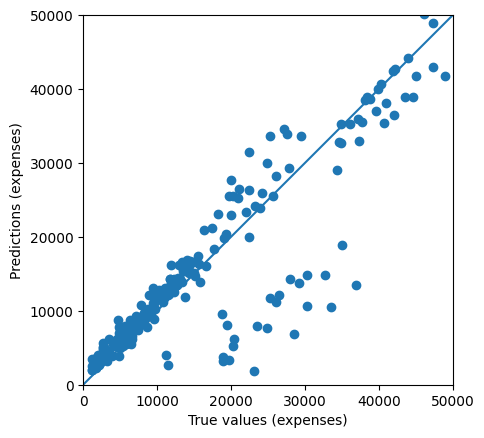

In [25]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
